In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [54]:
df = pd.read_csv("../data_raw/player_stats_with_salaries.csv")
df.head()


,Player,Squad,Pos,Age,Gls,Ast,Min,MP,GS,xG,...,Red,League,Country,Source,Source_URL,position,age,weekly_gross,annual_gross,currency
0,Brenden Aaronson,Leeds United,"FW,MF",25-064,1,2,911,16,10,2.1,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,AM,24.0,45000.0,2340000.0,£
1,Zach Abbott,Nott'ham Forest,DF,19-226,0,0,45,1,0,0.0,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,CB,19.0,12500.0,650000.0,£
2,Joshua Acheampong,Chelsea,DF,19-234,1,0,349,5,4,0.6,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,NaN,NaN,NaN,NaN,NaN
3,Tyler Adams,Bournemouth,MF,26-314,2,1,"1,195",15,15,0.5,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,DM,26.0,60000.0,3120000.0,£
4,Tosin Adarabioyo,Chelsea,DF,28-092,0,0,561,9,5,0.1,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,CB,27.0,120000.0,6240000.0,£


In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        2361 non-null   object 
 1   Squad         2361 non-null   object 
 2   Pos           2361 non-null   object 
 3   Age           2360 non-null   object 
 4   Gls           2361 non-null   int64  
 5   Ast           2361 non-null   int64  
 6   Min           2361 non-null   object 
 7   MP            2361 non-null   int64  
 8   GS            2361 non-null   int64  
 9   xG            2361 non-null   float64
 10  npxG          2361 non-null   float64
 11  xAG           2361 non-null   float64
 12  PrgC          2361 non-null   int64  
 13  PrgP          2361 non-null   int64  
 14  Yellow        2361 non-null   int64  
 15  Red           2361 non-null   int64  
 16  League        2361 non-null   object 
 17  Country       2361 non-null   object 
 18  Source        2361 non-null 

In [56]:
df_clean = df.dropna(subset=['annual_gross', 'Gls', 'Ast'])
df_clean

,Player,Squad,Pos,Age,Gls,Ast,Min,MP,GS,xG,...,Red,League,Country,Source,Source_URL,position,age,weekly_gross,annual_gross,currency
0,Brenden Aaronson,Leeds United,"FW,MF",25-064,1,2,911,16,10,2.1,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,AM,24.0,45000.0,2340000.0,£
1,Zach Abbott,Nott'ham Forest,DF,19-226,0,0,45,1,0,0.0,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,CB,19.0,12500.0,650000.0,£
3,Tyler Adams,Bournemouth,MF,26-314,2,1,"1,195",15,15,0.5,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,DM,26.0,60000.0,3120000.0,£
4,Tosin Adarabioyo,Chelsea,DF,28-092,0,0,561,9,5,0.1,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,CB,27.0,120000.0,6240000.0,£
5,Simon Adingra,Sunderland,"FW,MF",23-358,0,0,382,10,5,0.1,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,LW,23.0,70000.0,3640000.0,£
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,Warren Zaïre-Emery,Paris S-G,"MF,DF",19-292,1,1,"1,247",16,14,0.4,...,0,Ligue 1,France,cloudscraper,https://fbref.com/en/comps/13/stats/Ligue-1-Stats,CM,19.0,220192.0,11450000.0,€
2357,Denis Zakaria,Monaco,MF,29-035,0,1,527,7,6,0.0,...,1,Ligue 1,France,cloudscraper,https://fbref.com/en/comps/13/stats/Ligue-1-Stats,DM,28.0,88461.0,4600000.0,€
2358,Melvin Zinga,Angers,GK,23-284,0,0,90,1,1,0.0,...,0,Ligue 1,France,cloudscraper,https://fbref.com/en/comps/13/stats/Ligue-1-Stats,GK,23.0,5192.0,270000.0,€
2359,Luck Zogbé,Brest,"FW,DF",20-276,0,0,4,3,0,0.0,...,0,Ligue 1,France,cloudscraper,https://fbref.com/en/comps/13/stats/Ligue-1-Stats,RB,20.0,12307.0,640000.0,€


In [57]:
df_clean.dtypes


Player           object
Squad            object
Pos              object
Age              object
Gls               int64
Ast               int64
Min              object
MP                int64
GS                int64
xG              float64
npxG            float64
xAG             float64
PrgC              int64
PrgP              int64
Yellow            int64
Red               int64
League           object
Country          object
Source           object
Source_URL       object
position         object
age             float64
weekly_gross    float64
annual_gross    float64
currency         object
dtype: object

In [58]:
df_clean[['annual_gross', 'Gls', 'Ast']].mean()

annual_gross    2.910612e+06
Gls             9.152455e-01
Ast             6.366925e-01
dtype: float64

In [59]:
df_clean[['annual_gross', 'Gls', 'Ast']].median()


annual_gross    1880000.0
Gls                   0.0
Ast                   0.0
dtype: float64

In [60]:
df_clean[['annual_gross', 'Gls', 'Ast']].std()


annual_gross    3.225541e+06
Gls             1.636910e+00
Ast             1.066456e+00
dtype: float64

In [61]:
df_clean[['annual_gross', 'Gls', 'Ast']].describe()


,annual_gross,Gls,Ast
count,1.935000e+03,1935.000000,1935.000000
mean,2.910612e+06,0.915245,0.636693
std,3.225541e+06,1.636910,1.066456
min,0.000000e+00,0.000000,0.000000
25%,9.400000e+05,0.000000,0.000000
50%,1.880000e+06,0.000000,0.000000
75%,3.640000e+06,1.000000,1.000000
max,3.125000e+07,19.000000,8.000000


In [62]:
df_clean[['annual_gross', 'Gls', 'Ast']].corr()



,annual_gross,Gls,Ast
annual_gross,1.000000,0.343456,0.290392
Gls,0.343456,1.000000,0.370070
Ast,0.290392,0.370070,1.000000


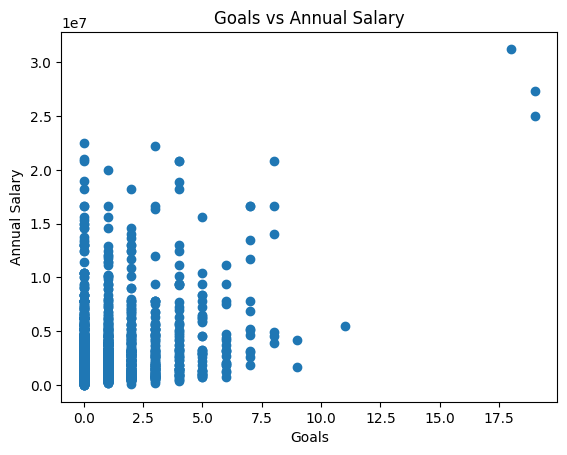

In [64]:
plt.figure()
plt.scatter(df_clean['Gls'],df_clean['annual_gross'])
plt.xlabel("Goals")
plt.ylabel("Annual Salary")
plt.title("Goals vs Annual Salary")
plt.show()


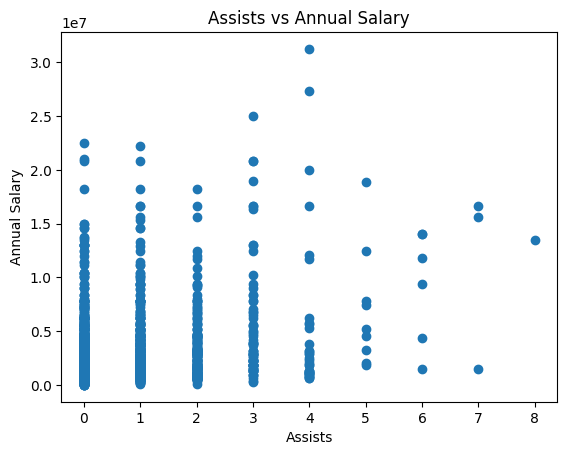

In [65]:
plt.figure()
plt.scatter(df_clean['Ast'], df_clean['annual_gross'])
plt.xlabel("Assists")
plt.ylabel("Annual Salary")
plt.title("Assists vs Annual Salary")
plt.show()
